# Exercise 2
# **Description**

In this second exercise we will focus on MNIST Data and classify the items of handwriting -- the digits 0 through 9.

We write a MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. we can stop training once we reach that level of accuracy.


Some notes:
It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class
I've started the code for you below -- how would you finish it?

***Imports***

In [31]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}\..\tmp2\mnist.npz"

***Callback Function***

we define a callback funtion in order to stop training once we reach the level of accuracy we want.

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99,5% accuracy so cancelling training!")
      self.model.stop_training = True

In [33]:
callbacks=myCallback()

The MNIST data is available directly in the tf.keras datasets API. we load it like this:

In [34]:
mnist = tf.keras.datasets.mnist

Calling load_data on this object will give us two sets of two lists, these will be the training and testing values for the graphics that contain the handwriting items and their digits.

In [29]:
 (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  62  91 213 255 228  91  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  70 230 253 253 253 253 253 152   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 246 253 253 253 253 253 253 253 106   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21 247 253 253 253 253 253 

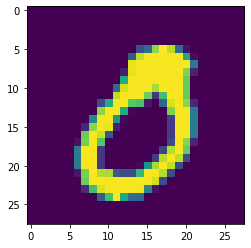

In [30]:
import numpy as np
np.set_printoptions(linewidth=400)
import matplotlib.pyplot as plt
plt.imshow(x_train[75])
print(y_train[75])
print(x_train[75])

# Normalization

In [35]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

# Designing the Model

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape =(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [37]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4356 - accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1184 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0352 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9921

Reached 99,5% accuracy so cancelling training!


In [39]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0210 - accuracy: 0.9938


[0.020978065207600594, 0.9938333630561829]

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
